In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys

In [11]:
os.chdir('C:\python-training\eyeglad\Amazon\Ads_analyze\market_explore')
print(os.getcwd())

C:\python-training\eyeglad\Amazon\Ads_analyze\market_explore


In [12]:
import Amazon_datacleaning as cl
import Amazon_counting as counting
import table_visualize as tv
from table_visualize import chinese_font

In [13]:
chinese_font()

In [14]:
# 讀取數據
df = pd.read_csv('C:/python-training/eyeglad/Amazon/data/marketing/240711_AmazonSales_OverFitGlasses.csv')

In [15]:
# 清理資料
cl.clean_price(df)
cl.clean_star(df)
cl.clean_monthly_sales(df)

0      1000
1         0
2         0
3         0
4         0
       ... 
995       0
996       0
997       0
998       0
999       0
Name: Sales in the Last Month, Length: 1000, dtype: int32

In [16]:
# 計算 "加權評分" (星星評分X評分數得)

top_brands_rated = counting.star_comment_count(df)
# 對 DataFrame 根據加權評分，進行排序
top_brands_rated_sorted = top_brands_rated.sort_values(by='Weighted Rating', ascending=False).head(10)
print("Top 10 品牌 (根據評分數多且評分高)")
print(top_brands_rated_sorted)

Top 10 品牌 (根據評分數多且評分高)
    Brand Name  Weighted Rating
123      NoCry        1882017.5
156    SUNGAIT        1076799.4
113    MERRY'S         918467.7
120  NORPERWIS         460526.0
109    LifeArt         409064.4
65       Gaoye         388395.0
48     FEISEDY         379827.1
112    MEETSUN         364125.8
40        DUCO         327376.8
90      Joopin         326920.7


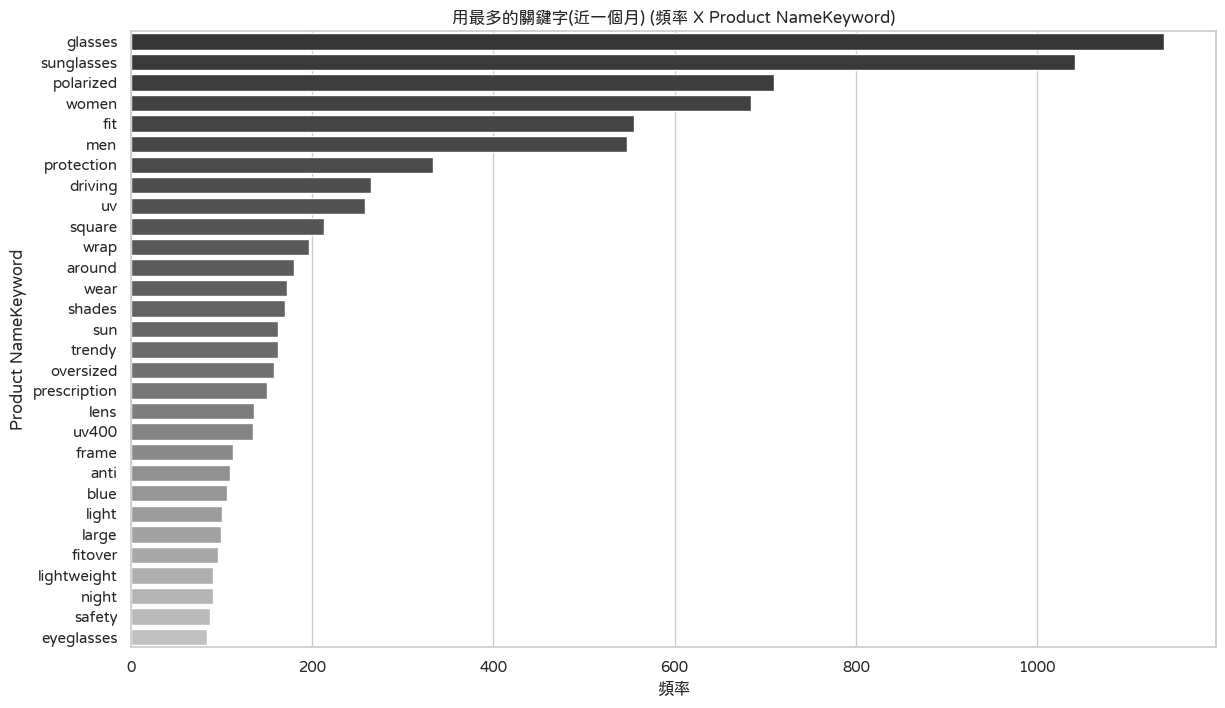

In [18]:
# 計算 "關鍵字" 出現頻率

common_words_df = counting.count_words(df, 'Product Name').head(30)
# print(common_words_df)
input_text = 'Product Name'
tv.two_d_bar_plot(data=common_words_df, x='頻率', y=f'{input_text}Keyword', color="Grays_d", title='用最多的關鍵字(近一個月)')

# 分析關鍵字與銷量的關係

In [19]:
print(df['Sales in the Last Month'])

0      1000
1         0
2         0
3         0
4         0
       ... 
995       0
996       0
997       0
998       0
999       0
Name: Sales in the Last Month, Length: 1000, dtype: int32


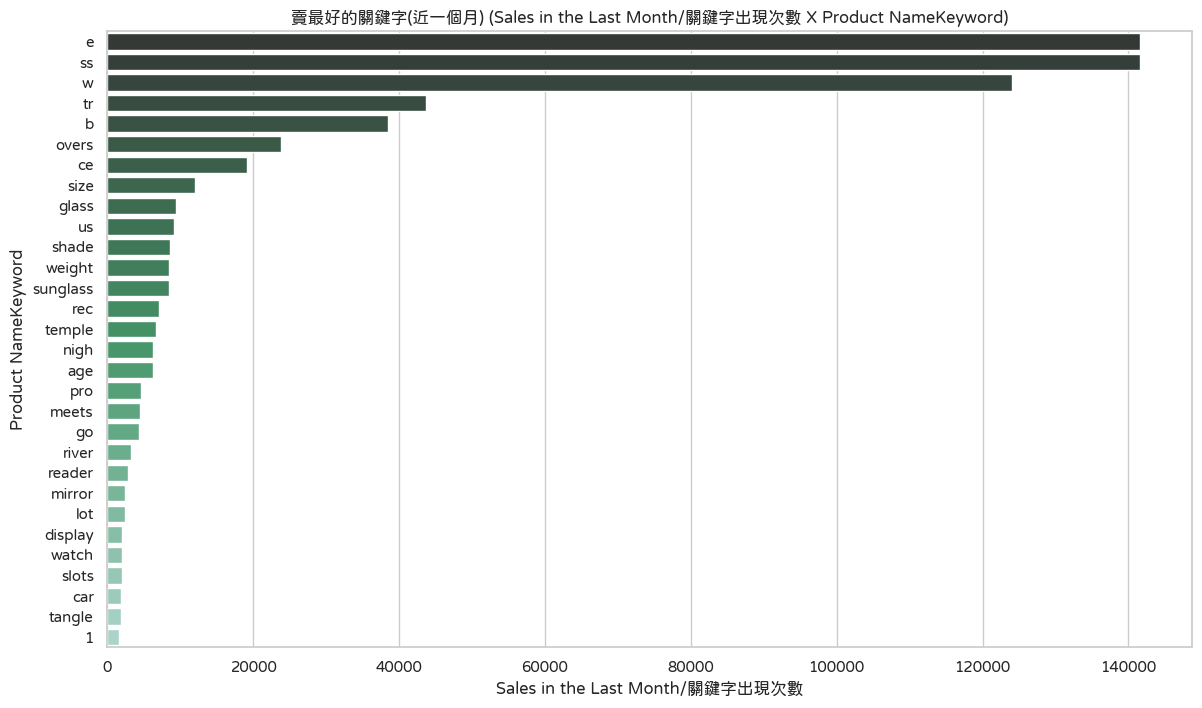

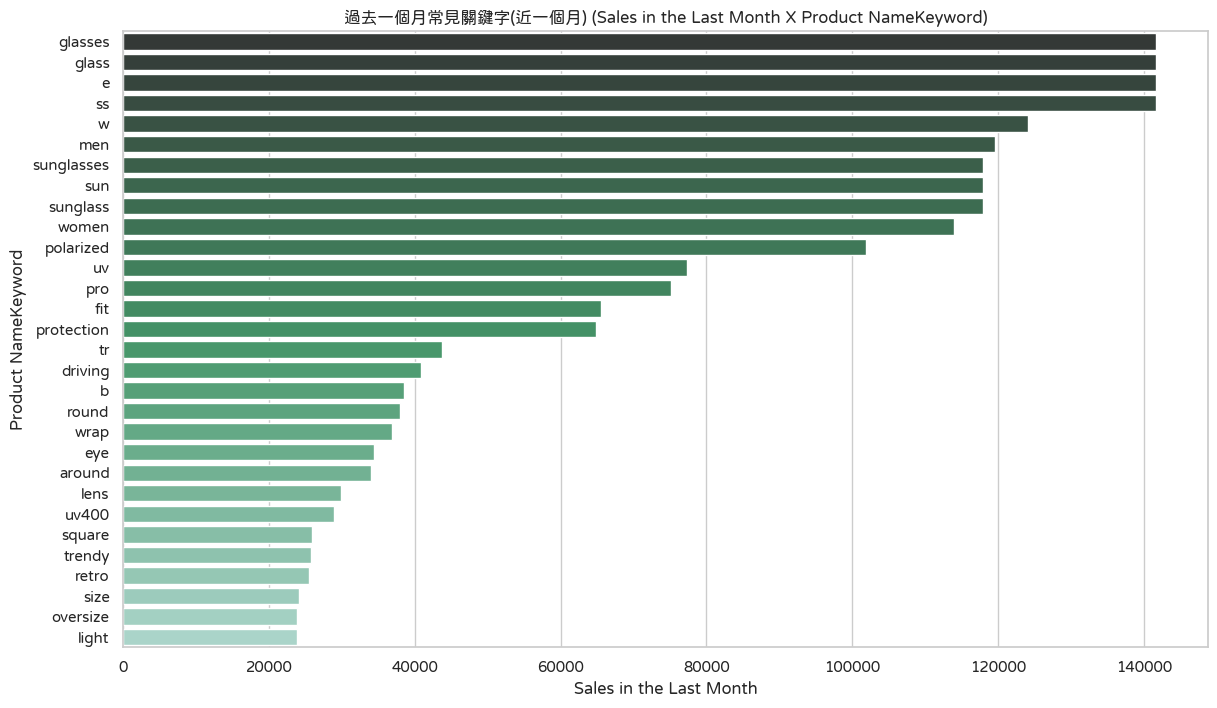

In [20]:
# 1. 過去一個月銷量 土法煉鋼計算
bysalesCount, recently_use = counting.analyze_keywords_and_sales(df, input_text='Product Name', target='Sales in the Last Month', top_n_keywords=30)
# keywords_set_1 = set(keywordsXsales['標題關鍵字'])
# keywords_set_2 = set(recently_use_df['標題關鍵字'])
# 繪製圖表
target='Sales in the Last Month'
input_text='Product Name'
tv.two_d_bar_plot(data=bysalesCount, x=f'{target}/關鍵字出現次數', y=f'{input_text}Keyword', color="BuGn_d", title='賣最好的關鍵字(近一個月)')
tv.two_d_bar_plot(data=recently_use, x=target, y=f'{input_text}Keyword', color="BuGn_d", title='過去一個月常見關鍵字(近一個月)')

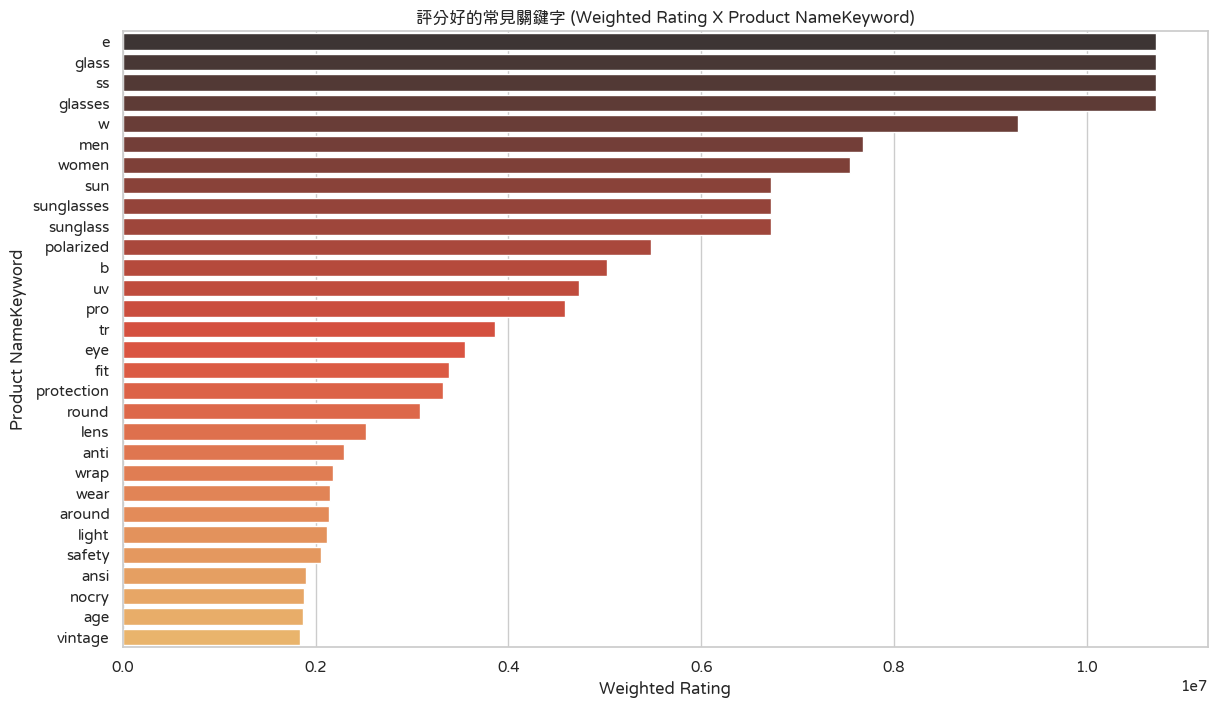

In [21]:
# 2. 加權評分 土法煉鋼計算
byscoreCount, high_score_use = counting.analyze_keywords_and_sales(df, input_text='Product Name', target='Weighted Rating', top_n_keywords=30)

# 繪製圖表
target='Weighted Rating'
# 評分不會因為更多間就比較好
# tv.two_d_bar_plot(data=byscoreCount, x=f'{target}/關鍵字出現次數', y=f'{input_text}Keyword', color="BuGn_d", title='賣最好的關鍵字')
tv.two_d_bar_plot(data=high_score_use, x=target, y=f'{input_text}Keyword', color="YlOrRd_d", title='評分好的常見關鍵字')

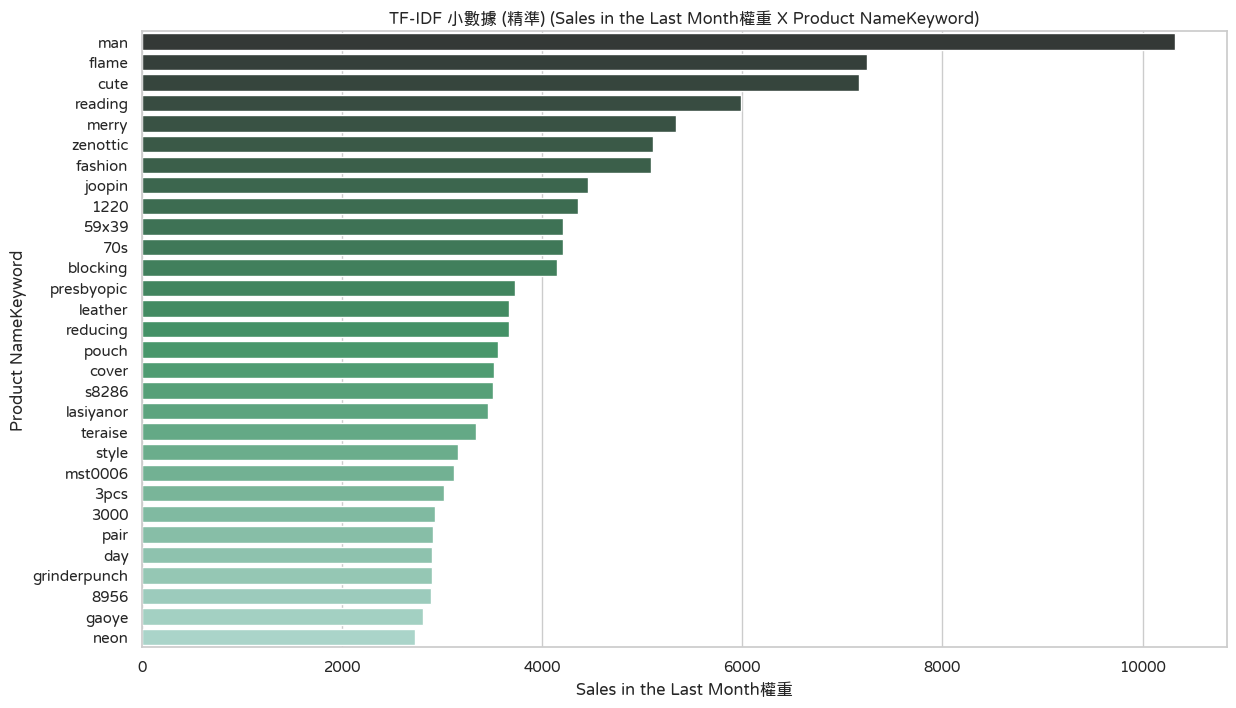

In [22]:
# 3. 過去一個月銷量 TF-IDF 分析 (小數據)
bysalesTFIDF_S = counting.tf_idf_analysis(df, input_text='Product Name', target_column='Sales in the Last Month', top_n_keywords=30)

input_text='Product Name'
target_column='Sales in the Last Month'
# 繪製圖表
tv.two_d_bar_plot(data=bysalesTFIDF_S, x=f'{target_column}權重', y=f'{input_text}Keyword', color="BuGn_d", title='TF-IDF 小數據 (精準)')

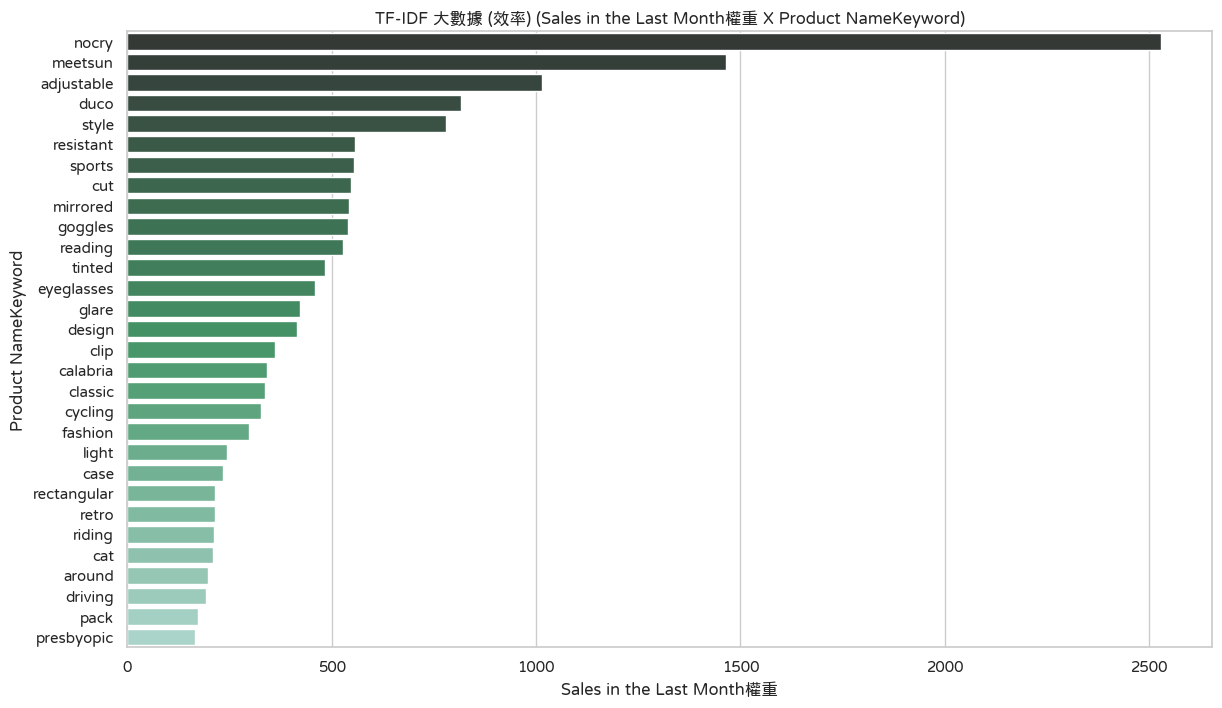

In [23]:
# 過去一個月銷量 TF-IDF 分析 (大數據)
bysalesTFIDF_B = counting.tf_idf_analysis(df, input_text='Product Name', target_column='Sales in the Last Month', top_n_keywords=30, max_features=100)

input_text='Product Name'
target_column='Sales in the Last Month'
# 繪製圖表
tv.two_d_bar_plot(data=bysalesTFIDF_B, x=f'{target_column}權重', y=f'{input_text}Keyword', color="BuGn_d", title='TF-IDF 大數據 (效率)')

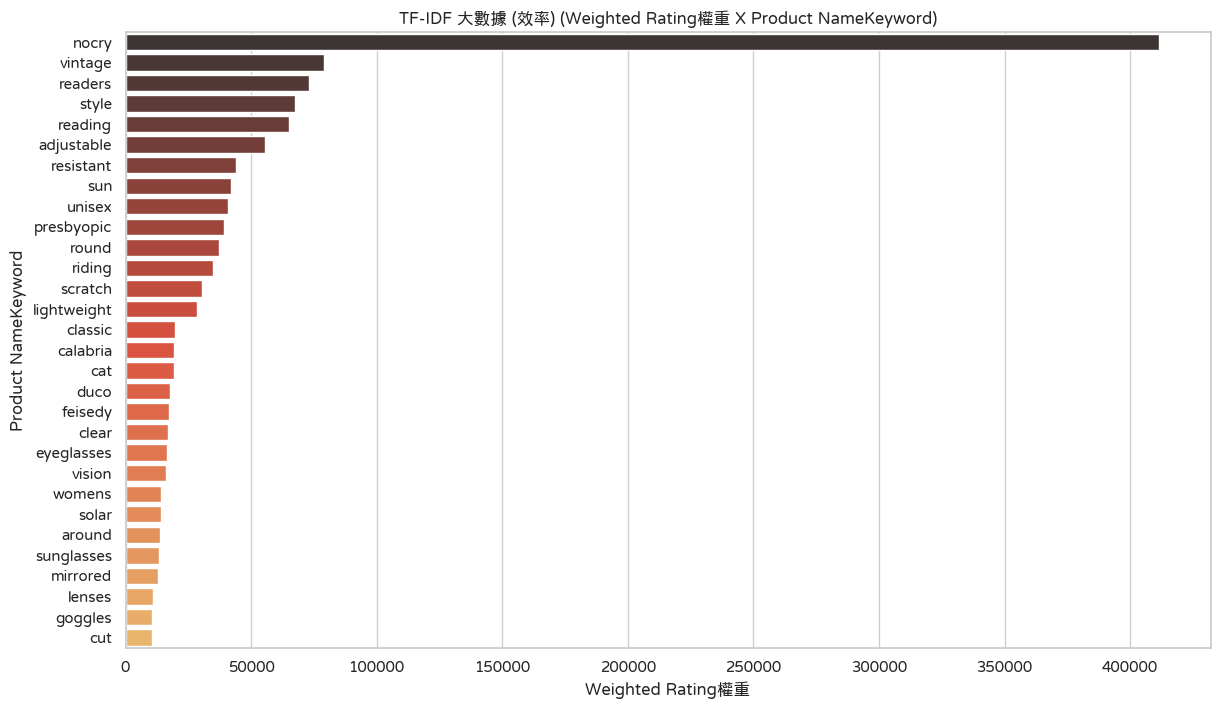

In [24]:
# 加權評分 TF-IDF 分析 (大數據)
byscoreTFIDF_B = counting.tf_idf_analysis(df, input_text='Product Name', target_column='Weighted Rating', top_n_keywords=30, max_features=100)

# keywords_set_a = set(byscoreTFIDF_B['商品名稱 關鍵字'])
# print(keywords_set_a)

input_text='Product Name'
target_column='Weighted Rating'
# 繪製圖表
tv.two_d_bar_plot(data=byscoreTFIDF_B, x=f'{target_column}權重', y=f'{input_text}Keyword', color="YlOrRd_d", title='TF-IDF 大數據 (效率)')

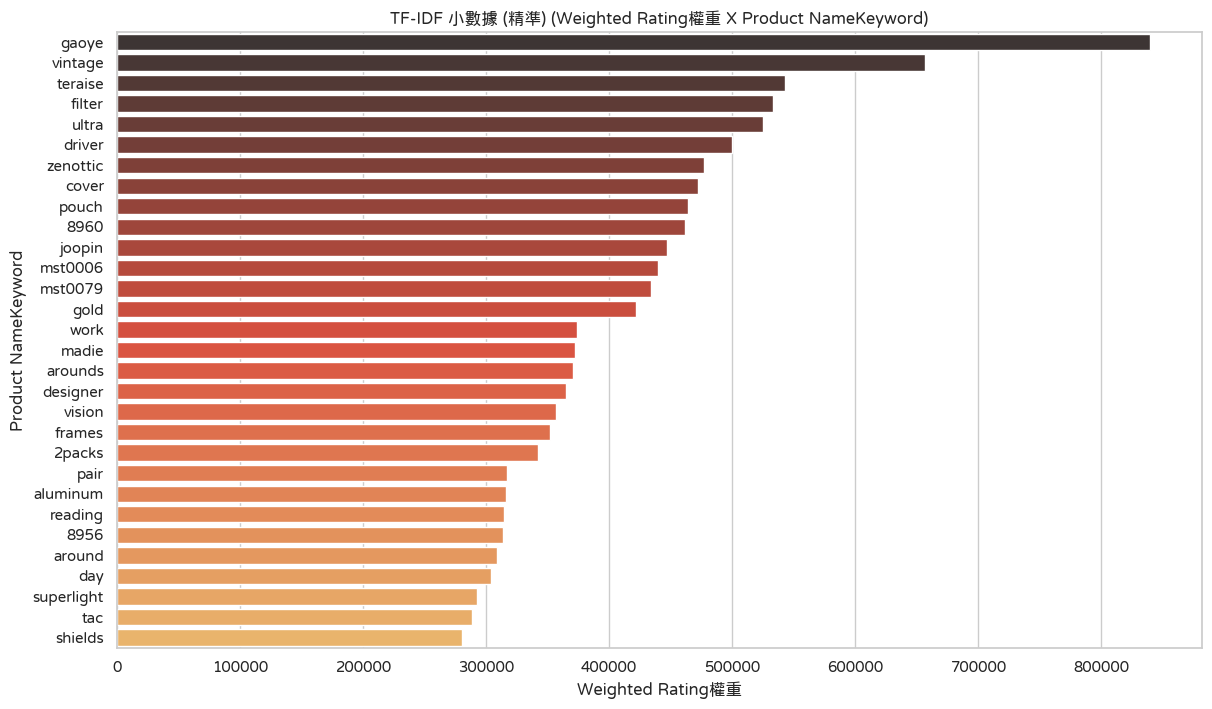

In [25]:
# 加權評分 TF-IDF 分析 (小數據)
byscoreTFIDF_S = counting.tf_idf_analysis(df, input_text='Product Name', target_column='Weighted Rating', top_n_keywords=30)

# keywords_set_b = set(tf_idf_S_return['商品名稱 關鍵字'])
# print(keywords_set_b)

input_text='Product Name'
target_column='Weighted Rating'
# 繪製圖表
tv.two_d_bar_plot(data=byscoreTFIDF_S, x=f'{target_column}權重', y=f'{input_text}Keyword', color="YlOrRd_d", title='TF-IDF 小數據 (精準)')

只在 高效 中出現的關鍵字:  age; go; us; meets; display; 1; rec; weight; lot; river; nigh; slots; overs; reader; car; tangle; ce; mirror; temple; shade; watch
只在 常見 中出現的關鍵字:  lens; uv; protection; light; round; women; uv400; glasses; eye; driving; fit; polarized; men; retro; trendy; square; sun; around; wrap; oversize; sunglasses
只在 產業 中出現的關鍵字:  reading; presbyopic; 3pcs; day; s8286; teraise; mst0006; merry; lasiyanor; 3000; fashion; 59x39; style; cute; man; 70s; blocking; grinderpunch; zenottic; joopin; pair; 1220; cover; reducing; flame; pouch; 8956; neon; leather; gaoye
在 高效 和 常見 中出現的關鍵字:  ss; b; tr; glass; sunglass; pro; size; w; e
在 高效 和 產業 中出現的關鍵字:  
在 常見 和 產業 中出現的關鍵字:  
在所有數據集中出現的關鍵字:  


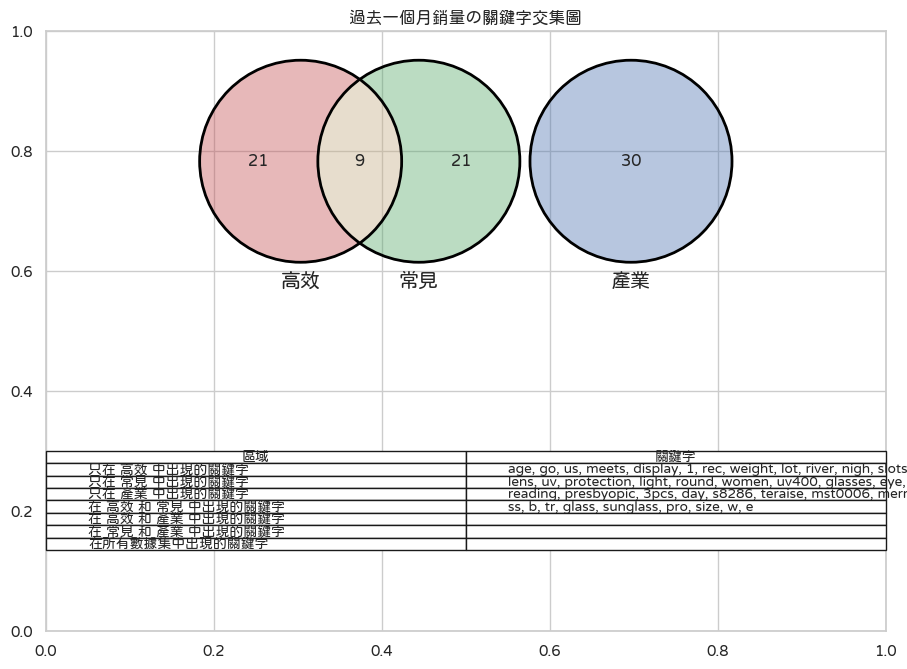

In [27]:
bysalesCount_set = set(bysalesCount['Product NameKeyword'])
recently_use = set(recently_use['Product NameKeyword'])
bysalesTFIDF_S = set(bysalesTFIDF_S['Product NameKeyword'])
tv.plot_venn_diagram(bysalesCount_set, recently_use, bysalesTFIDF_S, title="過去一個月銷量の關鍵字交集圖", label=('高效', '常見', '產業')) # 